In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("/Users/krushna/Documents/CSV Files/Missing Data/CCA/data_science_job.csv")

In [27]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [28]:
# Check Missing Values 

# df.isnull()-> Gives list of missing values 
# df.isnull().sum()-> Gives sum of all missing values 
# df.isnull().mean()-> Gives mean amogst all missing values
# df.isnull().mean()*100-> Gives % of mean amogst all missing values

df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [29]:
# We take columns less than 5% of missing values 
# -> City development index 
# -> Enrolled university
# -> Educational Level
# -> Training Hours

cols_with_less_than_5 = [col for col in df.columns 
                         if df[col].isnull().mean() < 0.05 
                         and df[col].isnull().mean()>0]
cols_with_less_than_5

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [30]:
df[cols_with_less_than_5].head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


In [31]:
# Check Impact of removing 
(len(df[cols_with_less_than_5].dropna())/ len(df))*100

# This means 89% will be remained unchanged 

89.68577095730244

In [32]:
df_new  = df[cols_with_less_than_5].dropna()
print("Orignal Data", df.shape)
print("New Data", df_new.shape)

Orignal Data (19158, 13)
New Data (17182, 5)


<Axes: >

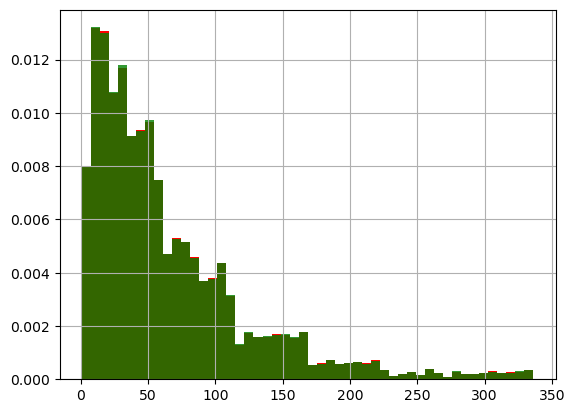

In [33]:
# Check again CCA is accuracy using ->EDA (Plot Histogram)for numerical

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_new['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

In [34]:
# They overlap so good that we can minimally see the difference, 
# which means CCA works better for training hours.

<Axes: >

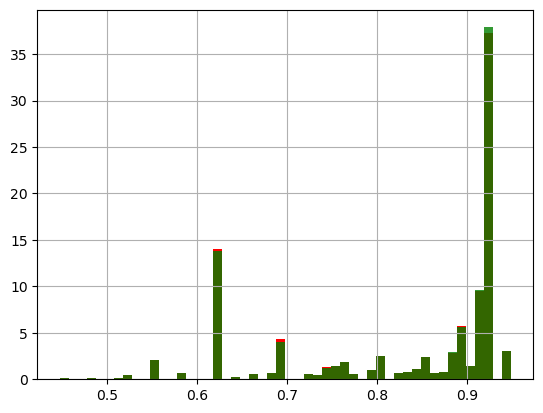

In [35]:
# Check again CCA for city_development_index

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_new['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: >

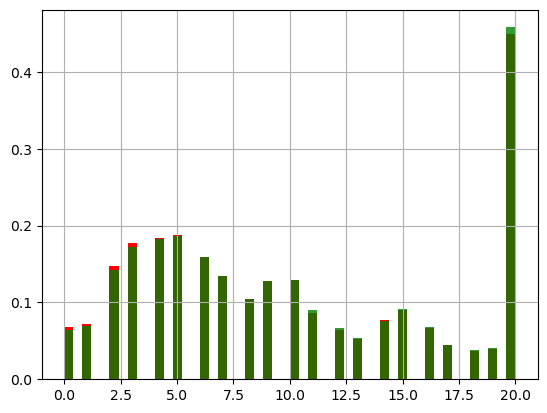

In [36]:
# Check again CCA for experience

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_new['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

In [37]:
# They overlap so good that we can minimally see the difference, 
# which means CCA works better for  city development index

This proves DATA WAS MISSING COMPLETELY AT RANDOM

In [38]:
 # For Categorical Data -> Check again CCA is accuracy using ->EDA
    
temp = pd.concat([
        # percentage of observation per category, orignal data
        df['education_level'].value_counts()/len(df),
        # percentage of observations per category, new data
         df_new['education_level'].value_counts()/len(df_new),
        
],
axis =1)

In [39]:
temp.columns = ['orignal', 'cca']

temp

,orignal,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [40]:
# There is a minute change in the vlaues before and after CCA.

In [41]:
 # For Categorical Data -> Check again CCA is accuracy using ->EDA
    
temp1 = pd.concat([
        # percentage of observation per category, orignal data
        df['enrolled_university'].value_counts()/len(df),
        # percentage of observations per category, new data
         df_new['enrolled_university'].value_counts()/len(df_new),
        
],
axis =1)

In [42]:
temp1.columns = ['orignal', 'cca']

temp1

,orignal,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [43]:
# There is a minute change in the vlaues before and after CCA.

THEREFORE, WE CAN APPLY CCA